# What is the best plan?

You work as an analyst for the telecommunications company Megaline. The company offers its customers prepaid plans, Surf and Ultimate. The sales department wants to know which of the plans brings in the most revenue in order to adjust the advertising budget.

You are going to carry out an initial analysis of the plans based on a small selection of customers. You'll have data on 500 Megaline customers: who they are, where they're from, which plan they use, the number of calls they made and messages they sent in 2018. Your job is to analyze customer behavior and determine which prepaid plans bring in the most revenue.

## Initialization

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
import random
from scipy.stats import norm
from scipy.stats import binom,norm


## Reading data

In [2]:
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Preparing the data



* I'll explore the data

## Plans

In [3]:
display(df_plans.info())
df_plans.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15360.000000        500.000000   
25%           287.500000           19200.000000       1125.000000   
50%           525.000000           23040.000000       1750.000000   
75%           762.500000           26880.000000       2375.000000   
max          1000.000000           30720.000000       3000.000000   

       usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  
count         2.000000     2.00000         2.000000        2.000000  
mean         45.000000     8.50000         0.020000        0.020000  
std          35.355339     2.12132         0.014142        0.014142  
min          20.000000     7.00000         0.010000        0.010000  
25%          32.500000     7.75000         0.015000        0.015000  
50%          45.000000     8.50000         0.020000        0.020000  
75%          57.500000     9.25000         0.025000        0.025000  
max          70.000000    10.00000         0.030000        0.030000

In [4]:
df_plans.duplicated().sum()

0

In [5]:

df_plans.head()


messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate

 * After analysis, no errors were detected for correction, nor any anomalies such as missing or duplicated values.

## Correcting data


- It's not necessary

## Enrich the data

* I've added a column of months to make the query easier if necessary.
* I changed the data type to int in the renamed column and transformed it from mb to gb.

In [6]:
df_plans = df_plans.rename(columns={
    'mb_per_month_included': 'gb_per_month_included'})

In [7]:
df_plans['gb_per_month_included'] = df_plans['gb_per_month_included'] / 1024
df_plans['gb_per_month_included']= df_plans['gb_per_month_included'].astype('int')
df_plans

messages_included  gb_per_month_included  minutes_included  \
0                 50                     15               500   
1               1000                     30              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate

## Users

In [8]:
print(df_users.info())
df_users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000

In [9]:
df_users.duplicated().sum()

0

In [10]:

df_users.head(15)

user_id first_name  last_name  age  \
0      1000   Anamaria      Bauer   45   
1      1001     Mickey  Wilkerson   28   
2      1002     Carlee    Hoffman   36   
3      1003   Reynaldo    Jenkins   52   
4      1004    Leonila   Thompson   40   
5      1005      Livia    Shields   31   
6      1006     Jesusa   Bradford   73   
7      1007    Eusebio      Welch   42   
8      1008      Emely    Hoffman   53   
9      1009      Gerry     Little   19   
10     1010     Wilber      Blair   52   
11     1011     Halina      Henry   73   
12     1012    Jonelle    Mcbride   59   
13     1013    Nicolas     Snider   50   
14     1014    Edmundo      Simon   61   

                                         city    reg_date      plan  \
0       Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   
1             Seattle-Tacoma-Bellevue, WA MSA  2018-08-13      surf   
2        Las Vegas-Henderson-Paradise, NV MSA  2018-10-21      surf   
3                               Tulsa, OK MSA  2018-01-28      surf   
4             Seattle-Tacoma-Bellevue, WA MSA  2018-05-23      surf   
5         Dallas-Fort Worth-Arlington, TX MSA  2018-11-29      surf   
6      San Francisco-Oakland-Berkeley, CA MSA  2018-11-27  ultimate   
7               Grand Rapids-Kentwood, MI MSA  2018-07-11      surf   
8           Orlando-Kissimmee-Sanford, FL MSA  2018-08-03  ultimate   
9      San Jose-Sunnyvale-Santa Clara, CA MSA  2018-04-22      surf   
10        Dallas-Fort Worth-Arlington, TX MSA  2018-03-09      surf   
11                   Cleveland-Elyria, OH MSA  2018-01-18  ultimate   
12     Chicago-Naperville-Elgin, IL-IN-WI MSA  2018-06-28      surf   
13                          Knoxville, TN MSA  2018-12-01  ultimate   
14  New York-Newark-Jersey City, NY-NJ-PA MSA  2018-11-25      surf   

    churn_date  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
5          NaN  
6   2018-12-18  
7          NaN  
8          NaN  
9          NaN  
10         NaN  
11         NaN  
12  2018-11-16  
13         NaN  
14         NaN



* Missing data in churn_date, but data that was active when the data frame was collected.
* Change in the dtype of reg_date since they are made up entirely of a single date type.

### Correcting data



* To avoid missing data, I'll replace it with 'active'. And the data type of the dates.

In [11]:

df_users['churn_date'] = df_users['churn_date'].fillna('active')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y/%m/%d')

display(df_users.head(20))
df_users.info()

user_id first_name  last_name  age  \
0      1000   Anamaria      Bauer   45   
1      1001     Mickey  Wilkerson   28   
2      1002     Carlee    Hoffman   36   
3      1003   Reynaldo    Jenkins   52   
4      1004    Leonila   Thompson   40   
5      1005      Livia    Shields   31   
6      1006     Jesusa   Bradford   73   
7      1007    Eusebio      Welch   42   
8      1008      Emely    Hoffman   53   
9      1009      Gerry     Little   19   
10     1010     Wilber      Blair   52   
11     1011     Halina      Henry   73   
12     1012    Jonelle    Mcbride   59   
13     1013    Nicolas     Snider   50   
14     1014    Edmundo      Simon   61   
15     1015      Beata  Carpenter   26   
16     1016       Jann    Salinas   30   
17     1017      Boris      Gates   61   
18     1018     Dennis     Grimes   70   
19     1019     Shizue     Landry   34   

                                                city   reg_date      plan  \
0              Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24  ultimate   
1                    Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
2               Las Vegas-Henderson-Paradise, NV MSA 2018-10-21      surf   
3                                      Tulsa, OK MSA 2018-01-28      surf   
4                    Seattle-Tacoma-Bellevue, WA MSA 2018-05-23      surf   
5                Dallas-Fort Worth-Arlington, TX MSA 2018-11-29      surf   
6             San Francisco-Oakland-Berkeley, CA MSA 2018-11-27  ultimate   
7                      Grand Rapids-Kentwood, MI MSA 2018-07-11      surf   
8                  Orlando-Kissimmee-Sanford, FL MSA 2018-08-03  ultimate   
9             San Jose-Sunnyvale-Santa Clara, CA MSA 2018-04-22      surf   
10               Dallas-Fort Worth-Arlington, TX MSA 2018-03-09      surf   
11                          Cleveland-Elyria, OH MSA 2018-01-18  ultimate   
12            Chicago-Naperville-Elgin, IL-IN-WI MSA 2018-06-28      surf   
13                                 Knoxville, TN MSA 2018-12-01  ultimate   
14         New York-Newark-Jersey City, NY-NJ-PA MSA 2018-11-25      surf   
15                                Pittsburgh, PA MSA 2018-12-05      surf   
16                                    Fresno, CA MSA 2018-10-25      surf   
17  Washington-Arlington-Alexandria, DC-VA-MD-WV MSA 2018-08-26      surf   
18              Indianapolis-Carmel-Anderson, IN MSA 2018-10-17      surf   
19                              Jacksonville, FL MSA 2018-01-16      surf   

    churn_date  
0       active  
1       active  
2       active  
3       active  
4       active  
5       active  
6   2018-12-18  
7       active  
8       active  
9       active  
10      active  
11      active  
12  2018-11-16  
13      active  
14      active  
15      active  
16      active  
17      active  
18      active  
19      active

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Enriching Data

* I've added a months column to make it easier to query if necessary.

In [12]:
df_users['month'] = df_users['reg_date'].dt.month
df_users

user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city   reg_date      plan  \
0        Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24  ultimate   
1              Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
2         Las Vegas-Henderson-Paradise, NV MSA 2018-10-21      surf   
3                                Tulsa, OK MSA 2018-01-28      surf   
4              Seattle-Tacoma-Bellevue, WA MSA 2018-05-23      surf   
..                                         ...        ...       ...   
495  New York-Newark-Jersey City, NY-NJ-PA MSA 2018-09-04      surf   
496               New Orleans-Metairie, LA MSA 2018-02-20      surf   
497     Los Angeles-Long Beach-Anaheim, CA MSA 2018-12-10  ultimate   
498  New York-Newark-Jersey City, NY-NJ-PA MSA 2018-02-04      surf   
499          Orlando-Kissimmee-Sanford, FL MSA 2018-05-06      surf   

    churn_date  month  
0       active     12  
1       active      8  
2       active     10  
3       active      1  
4       active      5  
..         ...    ...  
495     active      9  
496     active      2  
497     active     12  
498     active      2  
499     active      5  

[500 rows x 9 columns]

## Calls

In [13]:
display(df_calls.info())
df_calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000

In [14]:
df_calls

id  user_id   call_date  duration
0        1000_93     1000  2018-12-27      8.52
1       1000_145     1000  2018-12-27     13.66
2       1000_247     1000  2018-12-27     14.48
3       1000_309     1000  2018-12-28      5.76
4       1000_380     1000  2018-12-30      4.22
...          ...      ...         ...       ...
137730  1499_199     1499  2018-11-21      8.72
137731  1499_200     1499  2018-10-20     10.89
137732  1499_201     1499  2018-09-21      8.12
137733  1499_202     1499  2018-10-10      0.37
137734  1499_203     1499  2018-12-29     13.86

[137735 rows x 4 columns]



* call_date with wrong data type
* I preferred to leave calls at 0.0 minutes

### Correcting data

In [15]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y/%m/%d')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriching data

* I've added a months column to make it easier to query if necessary.

In [16]:

df_calls['month'] = df_calls['call_date'].dt.month
df_calls

id  user_id  call_date  duration  month
0        1000_93     1000 2018-12-27      8.52     12
1       1000_145     1000 2018-12-27     13.66     12
2       1000_247     1000 2018-12-27     14.48     12
3       1000_309     1000 2018-12-28      5.76     12
4       1000_380     1000 2018-12-30      4.22     12
...          ...      ...        ...       ...    ...
137730  1499_199     1499 2018-11-21      8.72     11
137731  1499_200     1499 2018-10-20     10.89     10
137732  1499_201     1499 2018-09-21      8.12      9
137733  1499_202     1499 2018-10-10      0.37     10
137734  1499_203     1499 2018-12-29     13.86     12

[137735 rows x 5 columns]

## Messages

In [17]:
display(df_messages.info())
df_messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000

In [18]:

df_messages

id  user_id message_date
0      1000_125     1000   2018-12-27
1      1000_160     1000   2018-12-31
2      1000_223     1000   2018-12-31
3      1000_251     1000   2018-12-27
4      1000_255     1000   2018-12-26
...         ...      ...          ...
76046  1497_526     1497   2018-12-24
76047  1497_536     1497   2018-12-24
76048  1497_547     1497   2018-12-31
76049  1497_558     1497   2018-12-24
76050  1497_613     1497   2018-12-23

[76051 rows x 3 columns]



* We need to change the type of data.

### Correcting data

* Data type correction.

In [19]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'] , format='%Y/%m/%d')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriching data

* I've added a months column to make it easier to query if necessary.

In [20]:
df_messages['month'] = df_messages['message_date'].dt.month
df_messages

id  user_id message_date  month
0      1000_125     1000   2018-12-27     12
1      1000_160     1000   2018-12-31     12
2      1000_223     1000   2018-12-31     12
3      1000_251     1000   2018-12-27     12
4      1000_255     1000   2018-12-26     12
...         ...      ...          ...    ...
76046  1497_526     1497   2018-12-24     12
76047  1497_536     1497   2018-12-24     12
76048  1497_547     1497   2018-12-31     12
76049  1497_558     1497   2018-12-24     12
76050  1497_613     1497   2018-12-23     12

[76051 rows x 4 columns]

## Internet

In [21]:
display(df_internet.info())
df_internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000

In [22]:
df_internet

id  user_id session_date  mb_used
0        1000_13     1000   2018-12-29    89.86
1       1000_204     1000   2018-12-31     0.00
2       1000_379     1000   2018-12-28   660.40
3       1000_413     1000   2018-12-26   270.99
4       1000_442     1000   2018-12-27   880.22
...          ...      ...          ...      ...
104820  1499_215     1499   2018-10-20   218.06
104821  1499_216     1499   2018-12-30   304.72
104822  1499_217     1499   2018-09-22   292.75
104823  1499_218     1499   2018-12-07     0.00
104824  1499_219     1499   2018-12-24   758.31

[104825 rows x 4 columns]



*  I need to change the data type.

### Correcting data

* Data type correction


In [23]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'] , format='%Y/%m/%d')


### Enriching data

* I've added a months column to make it easier to query if necessary.

In [24]:
df_internet['month'] = df_internet['session_date'].dt.month
df_internet

id  user_id session_date  mb_used  month
0        1000_13     1000   2018-12-29    89.86     12
1       1000_204     1000   2018-12-31     0.00     12
2       1000_379     1000   2018-12-28   660.40     12
3       1000_413     1000   2018-12-26   270.99     12
4       1000_442     1000   2018-12-27   880.22     12
...          ...      ...          ...      ...    ...
104820  1499_215     1499   2018-10-20   218.06     10
104821  1499_216     1499   2018-12-30   304.72     12
104822  1499_217     1499   2018-09-22   292.75      9
104823  1499_218     1499   2018-12-07     0.00     12
104824  1499_219     1499   2018-12-24   758.31     12

[104825 rows x 5 columns]

## Study plan conditions

In [25]:
df_plans

messages_included  gb_per_month_included  minutes_included  \
0                 50                     15               500   
1               1000                     30              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate

## Aggregated data per user



In [26]:
df_cm = df_calls.pivot_table(index = ['user_id', 'month'],
                                 values = 'id',
                                 aggfunc = 'count').reset_index()
df_cm


user_id  month  id
0        1000     12  16
1        1001      8  27
2        1001      9  49
3        1001     10  65
4        1001     11  64
...       ...    ...  ..
2253     1498     12  39
2254     1499      9  41
2255     1499     10  53
2256     1499     11  45
2257     1499     12  65

[2258 rows x 3 columns]

In [27]:
df_um= df_calls.pivot_table(index=['user_id','month'],
                          values = 'duration',
                          aggfunc = 'sum')

display(df_um)


duration
user_id month          
1000    12       116.83
1001    8        171.14
        9        297.69
        10       374.11
        11       404.59
...                 ...
1498    12       324.77
1499    9        330.37
        10       363.28
        11       288.56
        12       468.10

[2258 rows x 1 columns]

In [28]:

df_mm = df_messages.pivot_table(index = ['user_id', 'month'],
                                 values = 'id',
                                 aggfunc = 'count').reset_index()
df_mm


user_id  month  id
0        1000     12  11
1        1001      8  30
2        1001      9  44
3        1001     10  53
4        1001     11  36
...       ...    ...  ..
1801     1496      9  21
1802     1496     10  18
1803     1496     11  13
1804     1496     12  11
1805     1497     12  50

[1806 rows x 3 columns]

In [29]:

df_im= df_internet.pivot_table(index=['user_id','month'],
                          values = 'mb_used',
                          aggfunc = 'sum')

display(df_im)

mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
...                 ...
1498    12     23137.69
1499    9      12984.76
        10     19492.43
        11     16813.83
        12     22059.21

[2277 rows x 1 columns]

* I'm going to put the aggregated data in a DataFrame so that one record represents what a single user consumed in a given month.

In [30]:
dft= df_cm.merge(df_um, on =['user_id','month'])
dft= dft.merge(df_mm, on =['user_id','month'])
dft= dft.merge(df_im, on =['user_id','month'])

dft


user_id  month  id_x  duration  id_y   mb_used
0        1000     12    16    116.83    11   1901.47
1        1001      8    27    171.14    30   6919.15
2        1001      9    49    297.69    44  13314.82
3        1001     10    65    374.11    53  22330.49
4        1001     11    64    404.59    36  18504.30
...       ...    ...   ...       ...   ...       ...
1754     1496      9    52    389.94    21  16389.27
1755     1496     10    46    301.16    18  14287.36
1756     1496     11    39    291.88    13   8547.36
1757     1496     12    40    278.61    11  16438.99
1758     1497     12    54    276.53    50  11106.55

[1759 rows x 6 columns]

In [31]:
dft= dft.rename(columns= {'id_x': 'id_call_count',
                       'duration': 'total_minutes',
                       'id_y': 'id_messages_count',
                       })

dft

user_id  month  id_call_count  total_minutes  id_messages_count  \
0        1000     12             16         116.83                 11   
1        1001      8             27         171.14                 30   
2        1001      9             49         297.69                 44   
3        1001     10             65         374.11                 53   
4        1001     11             64         404.59                 36   
...       ...    ...            ...            ...                ...   
1754     1496      9             52         389.94                 21   
1755     1496     10             46         301.16                 18   
1756     1496     11             39         291.88                 13   
1757     1496     12             40         278.61                 11   
1758     1497     12             54         276.53                 50   

       mb_used  
0      1901.47  
1      6919.15  
2     13314.82  
3     22330.49  
4     18504.30  
...        ...  
1754  16389.27  
1755  14287.36  
1756   8547.36  
1757  16438.99  
1758  11106.55  

[1759 rows x 6 columns]

In [32]:
dft= dft.merge(df_users[['user_id', 'plan']], on= 'user_id')
dft

user_id  month  id_call_count  total_minutes  id_messages_count  \
0        1000     12             16         116.83                 11   
1        1001      8             27         171.14                 30   
2        1001      9             49         297.69                 44   
3        1001     10             65         374.11                 53   
4        1001     11             64         404.59                 36   
...       ...    ...            ...            ...                ...   
1754     1496      9             52         389.94                 21   
1755     1496     10             46         301.16                 18   
1756     1496     11             39         291.88                 13   
1757     1496     12             40         278.61                 11   
1758     1497     12             54         276.53                 50   

       mb_used      plan  
0      1901.47  ultimate  
1      6919.15      surf  
2     13314.82      surf  
3     22330.49      surf  
4     18504.30      surf  
...        ...       ...  
1754  16389.27      surf  
1755  14287.36      surf  
1756   8547.36      surf  
1757  16438.99      surf  
1758  11106.55  ultimate  

[1759 rows x 7 columns]

**Monthly revenue**

In [33]:

def chamadas_ex (row):
    plano = row['plan']
    minutos_usados = row['total_minutes']
    
    if plano == 'surf':
        if minutos_usados > 500:
            excedente = minutos_usados - 500   
        else:
            excedente = 0 
        if plano == 'ultimate':
            if minutos_usados > 3000:
                excedente = minutos_usados - 3000    
            else:
                excedente = 0      
        return excedente 

dft['calls_+']= dft.apply(chamadas_ex,axis=1)
dft

user_id  month  id_call_count  total_minutes  id_messages_count  \
0        1000     12             16         116.83                 11   
1        1001      8             27         171.14                 30   
2        1001      9             49         297.69                 44   
3        1001     10             65         374.11                 53   
4        1001     11             64         404.59                 36   
...       ...    ...            ...            ...                ...   
1754     1496      9             52         389.94                 21   
1755     1496     10             46         301.16                 18   
1756     1496     11             39         291.88                 13   
1757     1496     12             40         278.61                 11   
1758     1497     12             54         276.53                 50   

       mb_used      plan  calls_+  
0      1901.47  ultimate      NaN  
1      6919.15      surf      0.0  
2     13314.82      surf      0.0  
3     22330.49      surf      0.0  
4     18504.30      surf      0.0  
...        ...       ...      ...  
1754  16389.27      surf      0.0  
1755  14287.36      surf      0.0  
1756   8547.36      surf      0.0  
1757  16438.99      surf      0.0  
1758  11106.55  ultimate      NaN  

[1759 rows x 8 columns]

In [34]:
def mensagens_ex(row):
    plano = row['plan']
    mensagens_feitas = row['id_messages_count']
    
    if plano == 'surf':
        if mensagens_feitas > 50:
            excedente = mensagens_feitas - 50  
        else:
            excedente = 0  
        if plano == 'ultimate':
            if mensagens_feitas > 1000:
                excedente = mensagens_feitas - 1000   
            else:
                excedente = 0
        return excedente 
    
dft['mensagens_+']= dft.apply(mensagens_ex,axis=1)
dft

user_id  month  id_call_count  total_minutes  id_messages_count  \
0        1000     12             16         116.83                 11   
1        1001      8             27         171.14                 30   
2        1001      9             49         297.69                 44   
3        1001     10             65         374.11                 53   
4        1001     11             64         404.59                 36   
...       ...    ...            ...            ...                ...   
1754     1496      9             52         389.94                 21   
1755     1496     10             46         301.16                 18   
1756     1496     11             39         291.88                 13   
1757     1496     12             40         278.61                 11   
1758     1497     12             54         276.53                 50   

       mb_used      plan  calls_+  mensagens_+  
0      1901.47  ultimate      NaN          NaN  
1      6919.15      surf      0.0          0.0  
2     13314.82      surf      0.0          0.0  
3     22330.49      surf      0.0          3.0  
4     18504.30      surf      0.0          0.0  
...        ...       ...      ...          ...  
1754  16389.27      surf      0.0          0.0  
1755  14287.36      surf      0.0          0.0  
1756   8547.36      surf      0.0          0.0  
1757  16438.99      surf      0.0          0.0  
1758  11106.55  ultimate      NaN          NaN  

[1759 rows x 9 columns]

In [35]:
def internet_ex (row):
    plano = row['plan']
    internet_usada = row['mb_used']
    
    if plano == 'surf':
        if internet_usada > 15000:
            excedente = internet_usada - 15000 
        else: 
            excedente = 0 
        if plano == 'ultimate':
            if internet_usada > 30000:
                excedente = internet_usada - 30000  
            else:
                excedente = 0  
        return excedente 
    
dft['internet_+']= dft.apply(internet_ex,axis=1)
dft

user_id  month  id_call_count  total_minutes  id_messages_count  \
0        1000     12             16         116.83                 11   
1        1001      8             27         171.14                 30   
2        1001      9             49         297.69                 44   
3        1001     10             65         374.11                 53   
4        1001     11             64         404.59                 36   
...       ...    ...            ...            ...                ...   
1754     1496      9             52         389.94                 21   
1755     1496     10             46         301.16                 18   
1756     1496     11             39         291.88                 13   
1757     1496     12             40         278.61                 11   
1758     1497     12             54         276.53                 50   

       mb_used      plan  calls_+  mensagens_+  internet_+  
0      1901.47  ultimate      NaN          NaN         NaN  
1      6919.15      surf      0.0          0.0        0.00  
2     13314.82      surf      0.0          0.0        0.00  
3     22330.49      surf      0.0          3.0     7330.49  
4     18504.30      surf      0.0          0.0     3504.30  
...        ...       ...      ...          ...         ...  
1754  16389.27      surf      0.0          0.0     1389.27  
1755  14287.36      surf      0.0          0.0        0.00  
1756   8547.36      surf      0.0          0.0        0.00  
1757  16438.99      surf      0.0          0.0     1438.99  
1758  11106.55  ultimate      NaN          NaN         NaN  

[1759 rows x 10 columns]

In [36]:
dft.fillna(0, inplace=True)
dft.isna().sum()

user_id              0
month                0
id_call_count        0
total_minutes        0
id_messages_count    0
mb_used              0
plan                 0
calls_+              0
mensagens_+          0
internet_+           0
dtype: int64

In [37]:
def receita(row):
    plano = row['plan']
    exc= chamadas_ex(row)
    exm= mensagens_ex(row)
    exi= internet_ex(row)
    if exc is None:
        exc = 0
        
    if exm is None:
        exm = 0
        
    if exi is None:
        exi = 0
    
    if plano=='surf':
        total= exc * 0.03 + exm * 0.03 + exi * 10 + 20 
        
    if plano=='ultimate':
        total= exc * 0.01 + exm * 0.01 + exi * 7 + 70
    return total

In [38]:
dft['revenue'] = dft.apply(receita, axis=1)
dft

user_id  month  id_call_count  total_minutes  id_messages_count  \
0        1000     12             16         116.83                 11   
1        1001      8             27         171.14                 30   
2        1001      9             49         297.69                 44   
3        1001     10             65         374.11                 53   
4        1001     11             64         404.59                 36   
...       ...    ...            ...            ...                ...   
1754     1496      9             52         389.94                 21   
1755     1496     10             46         301.16                 18   
1756     1496     11             39         291.88                 13   
1757     1496     12             40         278.61                 11   
1758     1497     12             54         276.53                 50   

       mb_used      plan  calls_+  mensagens_+  internet_+   revenue  
0      1901.47  ultimate      0.0          0.0        0.00     70.00  
1      6919.15      surf      0.0          0.0        0.00     20.00  
2     13314.82      surf      0.0          0.0        0.00     20.00  
3     22330.49      surf      0.0          3.0     7330.49  73324.99  
4     18504.30      surf      0.0          0.0     3504.30  35063.00  
...        ...       ...      ...          ...         ...       ...  
1754  16389.27      surf      0.0          0.0     1389.27  13912.70  
1755  14287.36      surf      0.0          0.0        0.00     20.00  
1756   8547.36      surf      0.0          0.0        0.00     20.00  
1757  16438.99      surf      0.0          0.0     1438.99  14409.90  
1758  11106.55  ultimate      0.0          0.0        0.00     70.00  

[1759 rows x 11 columns]

## Study user behavior



* In this phase, some actions will be carried out in order to make it easier to observe user behavior based on certain aspects. To this end, I will draw up various graphical models and calculate the mean and dispersion.

### Calls

**Surf**

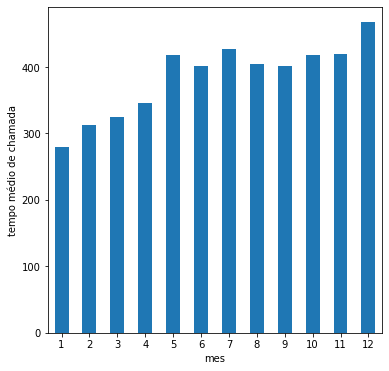

In [39]:
df_surf= dft[dft['plan']== 'surf']
df_surf_mean= df_surf.groupby('month')['total_minutes'].mean()


df_surf_mean.plot(kind= 'bar', figsize=(6,6), rot=360)
plt.xlabel('mes')#month
plt.ylabel('tempo médio de chamada')#average call time
plt.show()


**Ultimate**

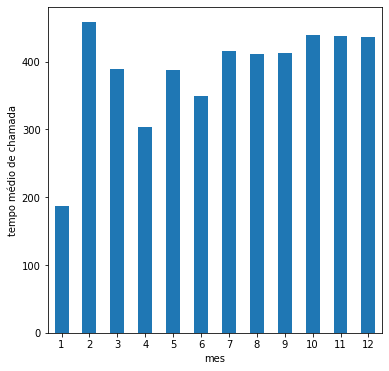

In [40]:
df_ultimate= dft[dft['plan']== 'ultimate']
df_ultimate_mean= df_ultimate.groupby('month')['total_minutes'].mean()

df_ultimate_mean.plot(kind= 'bar', figsize=(6,6), rot=360)
plt.xlabel('mes')#month
plt.ylabel('tempo médio de chamada')#average call time
plt.show()

* In the Surf plan, during the first four months, the average call time is under 400, from the fifth month onwards it rises to over 400. In the Ultimate plan, at the beginning of the year, the average duration of calls is below 200, and in months 4 and 6 it is below 400, while in the other months it is always above 400. It's interesting to note that the Surf plan grows almost sequentially, while the Ultimate plan grows unevenly.

**Surf**

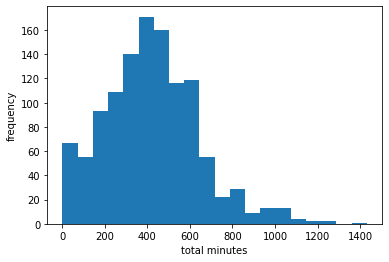

In [41]:
plt.hist(df_surf['total_minutes'], bins=20)
plt.xlabel('total minutes')
plt.ylabel('frequency')
plt.show()


**Ultimate**

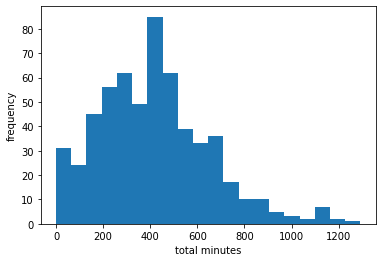

In [42]:
plt.hist(df_ultimate['total_minutes'], bins=20)
plt.xlabel('total minutes')
plt.ylabel('frequency')
plt.show()

**Surf**

In [43]:
df_surf['total_minutes'].mean()


420.77848305084746

In [44]:
variaçao= np.var(df_surf['total_minutes'])
variaçao#variation

49450.61976252937

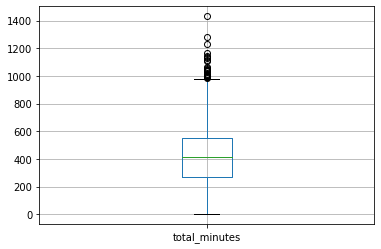

In [45]:
df_surf.boxplot(column= 'total_minutes');

**Ultimate**

In [46]:
df_ultimate['total_minutes'].mean()

417.5621588946459

In [47]:
variaçao= np.var(df_ultimate['total_minutes'])
variaçao#variation


55511.1930183098

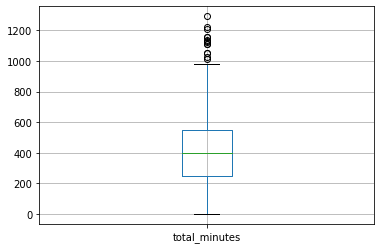

In [48]:
df_ultimate.boxplot(column= 'total_minutes');


* Around minutes 400 and 600, the frequency of the ultimate plan drops in relation to that of the surf plan, resulting in a slightly higher average, but the behavior of the two graphs for the two plans is nevertheless very similar.

* It can be seen that it is more common for users of the Surf package to exceed an average of 1,000 minutes, a figure which already significantly exceeds the limit offered by the plan. In other words, in this package it is likely that customers will have to pay an extra fee for the time exceeded, while in the Ultimate package this does not occur, since a limit of 3000 minutes per month is offered and it is noticeable that users do not use all of this time, thus avoiding additional expenses.

### Messages

**Surf**

In [49]:
df_m_surf= df_surf.groupby('month')['id_messages_count'].mean()
df_m_surf

month
1     21.000000
2     21.600000
3     21.937500
4     24.685714
5     33.547170
6     32.742857
7     34.786517
8     37.302521
9     38.585034
10    41.475138
11    40.087156
12    47.686992
Name: id_messages_count, dtype: float64

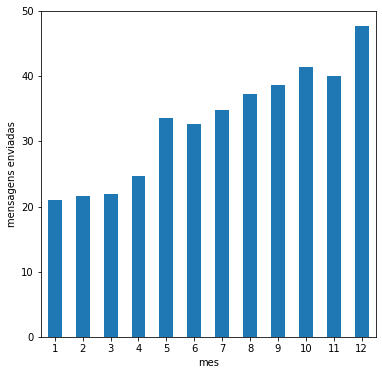

In [50]:
df_m_surf.plot(kind= 'bar', figsize=(6,6), rot=360)
plt.xlabel('mes')#month
plt.ylabel('mensagens enviadas')#messages sent
plt.show()

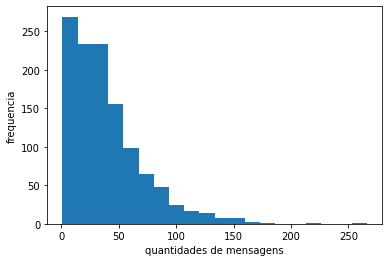

In [51]:
plt.hist(df_surf['id_messages_count'], bins=20)
plt.xlabel('quantidades de mensagens')#number of messages
plt.ylabel('frequencia')#frequency
plt.show()

In [52]:
df_surf['id_messages_count'].mean()

39.489830508474576

In [53]:
variaçao= np.var(df_surf['id_messages_count'])
variaçao#variation

1043.3329474288998

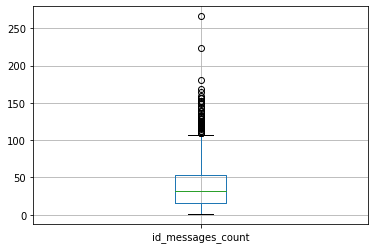

In [54]:
df_surf.boxplot(column= 'id_messages_count');

**Ultimate**

In [55]:
df_m_ultimate= df_ultimate.groupby('month')['id_messages_count'].mean()
df_m_ultimate

month
1     20.666667
2     27.800000
3     34.714286
4     28.937500
5     44.333333
6     37.135135
7     41.212766
8     47.929825
9     45.901408
10    47.488636
11    47.656863
12    53.744000
Name: id_messages_count, dtype: float64

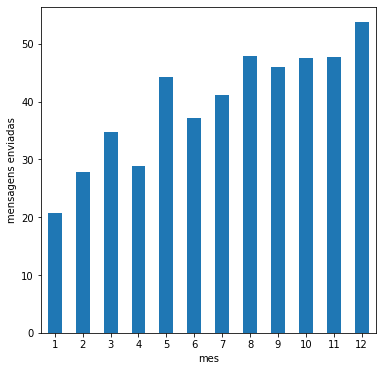

In [56]:
df_m_ultimate.plot(kind= 'bar', figsize=(6,6), rot=360)
plt.xlabel('mes')#month
plt.ylabel('mensagens enviadas')#messages sent
plt.show()

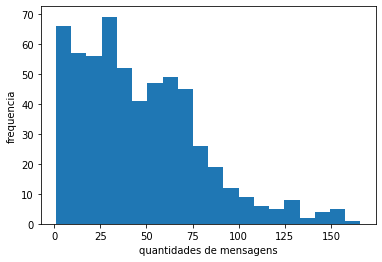

In [57]:
plt.hist(df_ultimate['id_messages_count'], bins=20)
plt.xlabel('quantidades de mensagens')#number of messages
plt.ylabel('frequencia')#frequency
plt.show()

In [58]:
df_ultimate['id_messages_count'].mean()

46.4559585492228

In [59]:
variançao= np.var(df_ultimate['id_messages_count'])
variançao#variation

1082.5209446338606

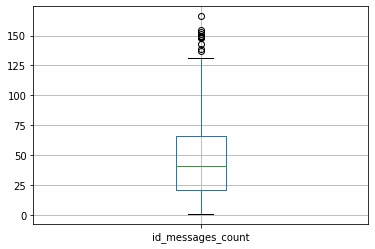

In [60]:
df_ultimate.boxplot(column= 'id_messages_count');


* The way they are handled varies depending on the plan, with Ultimate having a more even distribution than Surf. Bearing in mind that Surf only allows 50 messages per month, it's clear that many users exceed this limit.

### Internet

**Surf**

In [61]:
df_i_surf= df_surf.groupby('month')['mb_used'].mean()
df_i_surf

month
1      7894.790000
2      9310.764000
3     12397.342500
4     11851.091429
5     14851.419623
6     15565.743286
7     16708.588315
8     17161.736891
9     16492.743197
10    17406.222376
11    16300.159358
12    17968.352602
Name: mb_used, dtype: float64

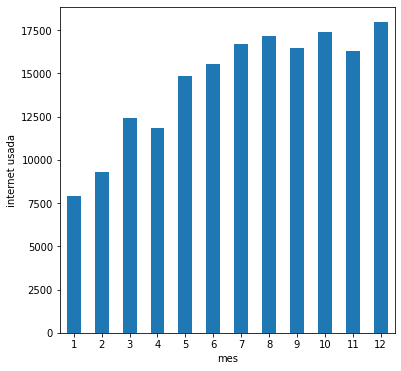

In [62]:
df_i_surf.plot(kind= 'bar', figsize=(6,6), rot=360)
plt.xlabel('mes')#month
plt.ylabel('internet usada')#internet used
plt.show()

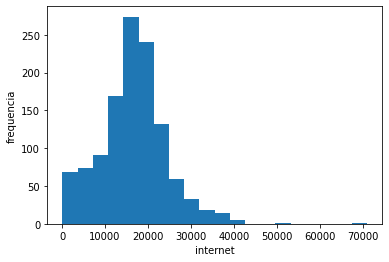

In [63]:
plt.hist(df_surf['mb_used'], bins=20)
plt.xlabel('internet')
plt.ylabel('frequencia')#frequency
plt.show()

In [64]:
df_surf['mb_used'].mean()

16629.01829661017

In [65]:
variaçao= np.var(df_surf['mb_used'])
variaçao#variation

59459709.008884974

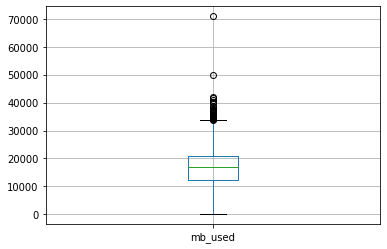

In [66]:
df_surf.boxplot(column= 'mb_used');

**Ultimate**

In [67]:
df_i_ultimate= df_ultimate.groupby('month')['mb_used'].mean()
df_i_ultimate

month
1      6953.200000
2     17335.756000
3     23835.722857
4     14285.791875
5     16993.530000
6     15451.022162
7     16499.324255
8     17976.983333
9     16410.551549
10    17512.219205
11    17323.745686
12    18267.285840
Name: mb_used, dtype: float64

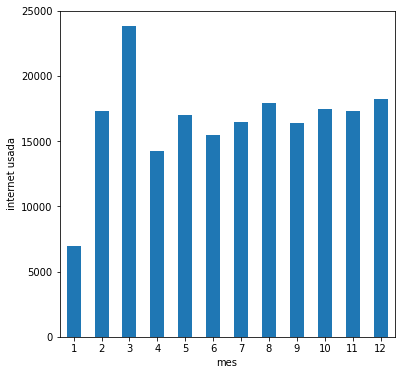

In [68]:
df_i_ultimate.plot(kind= 'bar', figsize=(6,6), rot=360)
plt.xlabel('mes')#month
plt.ylabel('internet usada')#internet used
plt.show()

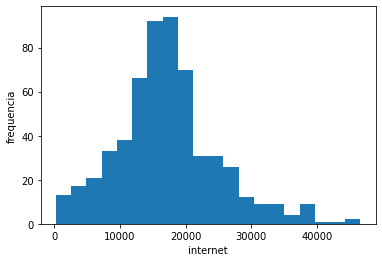

In [69]:
plt.hist(df_ultimate['mb_used'], bins=20)
plt.xlabel('internet')
plt.ylabel('frequencia')#frequency
plt.show()

In [70]:
df_ultimate['mb_used'].mean()

17250.995837651124

In [71]:
variaçao= np.var(df_ultimate['mb_used'])
variaçao#variation

58988421.28628612

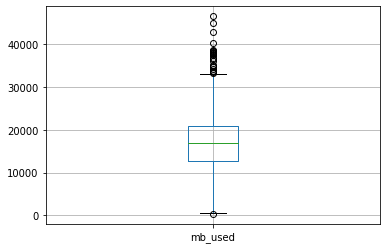

In [72]:
df_ultimate.boxplot(column= 'mb_used');



* The conduct of the plans is somewhat similar, as many users exceed the data limit provided, requiring an additional payment.

## Revenue

In [73]:
dft

user_id  month  id_call_count  total_minutes  id_messages_count  \
0        1000     12             16         116.83                 11   
1        1001      8             27         171.14                 30   
2        1001      9             49         297.69                 44   
3        1001     10             65         374.11                 53   
4        1001     11             64         404.59                 36   
...       ...    ...            ...            ...                ...   
1754     1496      9             52         389.94                 21   
1755     1496     10             46         301.16                 18   
1756     1496     11             39         291.88                 13   
1757     1496     12             40         278.61                 11   
1758     1497     12             54         276.53                 50   

       mb_used      plan  calls_+  mensagens_+  internet_+   revenue  
0      1901.47  ultimate      0.0          0.0        0.00     70.00  
1      6919.15      surf      0.0          0.0        0.00     20.00  
2     13314.82      surf      0.0          0.0        0.00     20.00  
3     22330.49      surf      0.0          3.0     7330.49  73324.99  
4     18504.30      surf      0.0          0.0     3504.30  35063.00  
...        ...       ...      ...          ...         ...       ...  
1754  16389.27      surf      0.0          0.0     1389.27  13912.70  
1755  14287.36      surf      0.0          0.0        0.00     20.00  
1756   8547.36      surf      0.0          0.0        0.00     20.00  
1757  16438.99      surf      0.0          0.0     1438.99  14409.90  
1758  11106.55  ultimate      0.0          0.0        0.00     70.00  

[1759 rows x 11 columns]

**Surf**

In [74]:
df_r_surf= df_surf.groupby('month')['revenue'].mean()
df_r_surf

month
1        20.000000
2      2659.962120
3     17270.392250
4     19085.330917
5     28604.334257
6     29685.037611
7     39479.564134
8     42476.678488
9     35249.801945
10    42882.597915
11    35089.179591
12    45342.140498
Name: revenue, dtype: float64

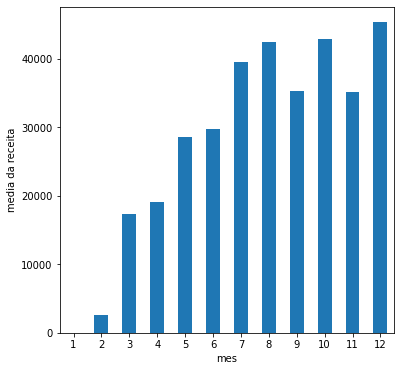

In [75]:
df_r_surf.plot(kind= 'bar', figsize=(6,6), rot=360)
plt.xlabel('mes')#month
plt.ylabel('media da receita')#mean revenue
plt.show()

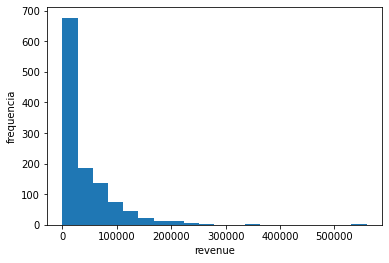

In [76]:
plt.hist(df_surf['revenue'], bins=20)
plt.xlabel('revenue')
plt.ylabel('frequencia')#frequency
plt.show()

In [77]:
df_surf['revenue'].mean()

38022.965921271185

In [78]:
variaçao= np.var(df_surf['revenue'])
variaçao#variation

2809094926.976652

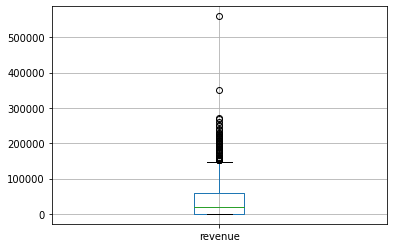

In [79]:
df_surf.boxplot(column= 'revenue');

**Ultimate**

In [80]:
df_r_ultimate= df_ultimate.groupby('month')['revenue'].mean()
df_r_ultimate

month
1     70.0
2     70.0
3     70.0
4     70.0
5     70.0
6     70.0
7     70.0
8     70.0
9     70.0
10    70.0
11    70.0
12    70.0
Name: revenue, dtype: float64

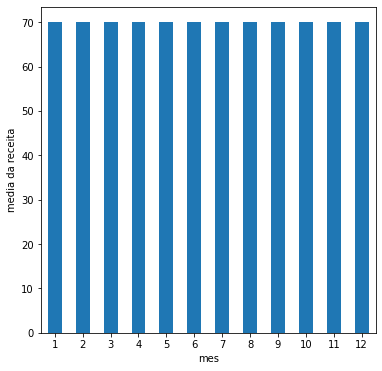

In [81]:
df_r_ultimate.plot(kind= 'bar', figsize=(6,6), rot=360)
plt.xlabel('mes')#month
plt.ylabel('media da receita')#mean revenue
plt.show()

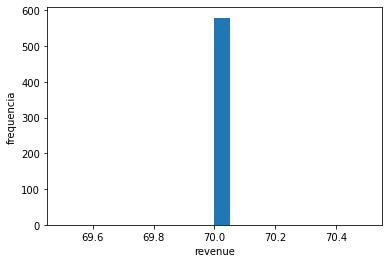

In [82]:
plt.hist(df_ultimate['revenue'], bins=20)
plt.xlabel('revenue')
plt.ylabel('frequencia')#frequency
plt.show()

In [83]:
df_ultimate['revenue'].mean()

70.0

In [84]:
variaçao= np.var(df_ultimate['revenue'])
variaçao#variation

0.0

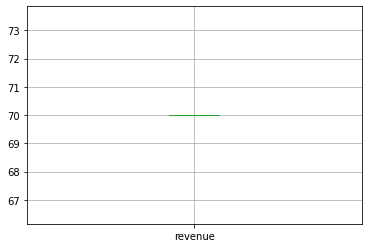

In [85]:
df_ultimate.boxplot(column= 'revenue');

* There is a big disparity in revenue between the plans, as users of the Surf plan tend to frequently pay more than the monthly fee due to exceeding usage limits. This leads to a considerable increase in costs, which is not observed in the Ultimate plan, where the limits are wider and better used, keeping customers within the established margins and avoiding extra charges.

## Test statistical hypotheses

* Testing the hypothesis that the average revenue of users of the Ultimate and Surf calling plans is different.

In [86]:
# Test the hypotheses
#H0= plan revenue is the same
#H1= plan revenue is different

surf_revenue= df_surf['revenue']
ultimate_revenue= df_ultimate['revenue']

alpha= 0.05

results= st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")#We reject the null hypothesis
else:
    print("Nós não podemos rejeitar a hipótese nula")#We cannot reject the null hypothesis

p-value: 4.204280748985147e-108
Nós rejeitamos a hipótese nula


* We reject the null hypothesis

In [91]:
df_surf

user_id  month  id_call_count  total_minutes  id_messages_count  \
1        1001      8             27         171.14                 30   
2        1001      9             49         297.69                 44   
3        1001     10             65         374.11                 53   
4        1001     11             64         404.59                 36   
5        1001     12             56         392.93                 44   
...       ...    ...            ...            ...                ...   
1753     1496      8             18         114.62                  2   
1754     1496      9             52         389.94                 21   
1755     1496     10             46         301.16                 18   
1756     1496     11             39         291.88                 13   
1757     1496     12             40         278.61                 11   

       mb_used  plan  calls_+  mensagens_+  internet_+   revenue  
1      6919.15  surf      0.0          0.0        0.00     20.00  
2     13314.82  surf      0.0          0.0        0.00     20.00  
3     22330.49  surf      0.0          3.0     7330.49  73324.99  
4     18504.30  surf      0.0          0.0     3504.30  35063.00  
5     19369.18  surf      0.0          0.0     4369.18  43711.80  
...        ...   ...      ...          ...         ...       ...  
1753   8605.66  surf      0.0          0.0        0.00     20.00  
1754  16389.27  surf      0.0          0.0     1389.27  13912.70  
1755  14287.36  surf      0.0          0.0        0.00     20.00  
1756   8547.36  surf      0.0          0.0        0.00     20.00  
1757  16438.99  surf      0.0          0.0     1438.99  14409.90  

[1180 rows x 11 columns]

* Through this statistical test we reject the null hypothesis, we reject the idea that the plans have equal revenues. I used the test on the Equality of the Averages of Two Populations because it was the most correct in this case.

* Test the hypothesis that the average revenue of users in the NY-NJ area differs from that of users in other regions.

In [88]:
#H0= Average revenue from NY-NJ is the same as other regions
#H1= The average revenue of users in the NY-NJ area is different from users in other regions.

dfrc=dft.merge(df_users, on = 'user_id')
dfrc = dfrc[['revenue','city']]
dfnynj = dfrc.loc[dfrc['city'].str.contains('NY-NJ')]
dfnynj = dfnynj.drop('city', axis =1 ).reset_index(drop=True)
dfnynj.columns = ['revenue_NY_NJ']



dfot = dfrc.loc[~dfrc['city'].str.contains('NY-NJ')]
dfot = dfot.drop('city', axis =1 ).reset_index(drop=True)
dfot.columns = ['revenue_others']


alpha = 0.05
results2= st.ttest_ind(dfnynj,dfot, equal_var=False)
print('p-value:', results2.pvalue)

if results2.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")#We reject the null hypothesis
else:
    print("Nós não podemos rejeitar a hipótese nula")#We cannot reject the null hypothesis
    
print(dfnynj.mean())

print(dfot.mean())


p-value: [0.59135563]
Nós não podemos rejeitar a hipótese nula
revenue_NY_NJ    24333.376745
dtype: float64
revenue_others    25755.822754
dtype: float64


* We cannot reject the null hypothesis

* Using this statistical test, we failed to reject the null hypothesis that the average revenue of users in the NY-NJ area is different from users in other regions. I used the test on the Equality of the Averages of Two Populations because it was the most correct in this case.

## Overall conclusion



* Because the surf plan has a lower limit, many people pay extra for using it, often exceeding the value of the ultimate plan, thus bringing in more money for the company. The ultimate plan doesn't; all its users pay 70 dollars. We can't say that the NY-NJ region's revenue is the same as the rest, but its average is a little lower than the rest.